In [20]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt  
import seaborn as sns 
from sklearn.preprocessing import minmax_scale

from scipy import stats
from scipy.stats import norm, skew #for some statistics
from sklearn.cluster import KMeans

In [2]:
# Reading data
trainDf = pd.read_csv ('data/ML-CUP20-TR.csv')

trainNormalized = minmax_scale(trainDf, feature_range=(-1,1), axis=0)
trainDf = pd.DataFrame(trainNormalized)
trainDf.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.550522,0.212219,0.026270,-0.189458,-0.136151,0.576014,-0.577201,0.769143,0.617715,-0.607772,0.234938,-0.736188
1,-0.511149,0.070740,0.731692,-0.545219,-0.345643,-0.042165,-0.594915,0.134171,0.510110,-0.390151,0.866585,-0.224639
2,-0.420367,0.415568,0.284060,-0.148601,-0.291042,0.013043,-0.697529,0.146658,0.272767,-0.601677,0.609394,-0.455939
3,-0.466592,0.476000,0.226370,-0.062484,-0.117040,0.224465,-0.234472,1.000000,0.511490,-0.261688,0.198577,-0.764267
4,0.204332,-0.016747,-0.300231,0.591344,0.280833,-0.002217,-0.027154,-0.131278,-0.338128,0.595841,-0.343548,-0.677183
5,-0.745628,0.274119,0.151378,-0.197374,-0.405744,-0.064005,-0.584867,0.671797,0.147947,-0.530837,0.230730,-0.745037
6,-0.510747,-0.031713,0.022754,0.322005,0.036963,0.370148,-0.328377,0.432914,-0.153711,-0.357555,0.089702,-0.835774
7,-0.667282,0.278573,0.402259,-0.434404,-0.318433,0.218369,-0.368681,0.276302,0.419710,-0.665707,0.364102,-0.646213
8,-0.574702,0.392948,0.097059,-0.040869,-0.220769,0.083248,-0.750432,0.387916,0.425373,-0.347971,0.436247,-0.587245
9,0.649302,-0.641284,-0.646825,-0.151746,0.528899,-0.113473,0.100287,-0.664870,-0.565644,0.112307,-0.819171,0.531732


In [3]:

trainX = trainDf.iloc[:, 1:10].values



In [4]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(trainX)
    wcss.append(kmeans.inertia_)

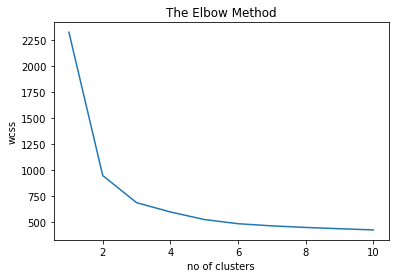

In [5]:
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [6]:
kmeansmodel = KMeans(n_clusters= 3, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(trainX)


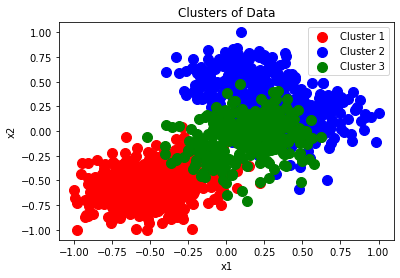

In [7]:

plt.scatter(trainX[y_kmeans == 0, 0], trainX[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(trainX[y_kmeans == 1, 0], trainX[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(trainX[y_kmeans == 2, 0], trainX[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.title('Clusters of Data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

### Data Analysis

In [8]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import normalize


In [9]:
# Reading data
trainDf = pd.read_csv ('data/ML-CUP20-TR.csv')
#transformer = normalize().fit(trainDf.values)
colnames=trainDf.columns.values
trainNormalized = normalize(trainDf.values, axis=0)
trainDf=pd.DataFrame(minmax_scale(trainDf, feature_range=(0,1), axis=0))
#trainDf = pd.DataFrame(transformer.transform(trainDf.values))
trainDf.columns=colnames
trainDf.head(10)


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,Y1,Y2
0,0.224739,0.606110,0.513135,0.405271,0.431924,0.788007,0.211400,0.884572,0.808857,0.196114,0.617469,0.131906
1,0.244425,0.535370,0.865846,0.227391,0.327178,0.478917,0.202542,0.567086,0.755055,0.304924,0.933293,0.387680
2,0.289817,0.707784,0.642030,0.425700,0.354479,0.506522,0.151235,0.573329,0.636383,0.199162,0.804697,0.272030
3,0.266704,0.738000,0.613185,0.468758,0.441480,0.612233,0.382764,1.000000,0.755745,0.369156,0.599288,0.117866
4,0.602166,0.491626,0.349885,0.795672,0.640416,0.498892,0.486423,0.434361,0.330936,0.797920,0.328226,0.161409
5,0.127186,0.637059,0.575689,0.401313,0.297128,0.467998,0.207566,0.835898,0.573974,0.234581,0.615365,0.127482
6,0.244626,0.484143,0.511377,0.661002,0.518481,0.685074,0.335811,0.716457,0.423144,0.321222,0.544851,0.082113
7,0.166359,0.639286,0.701130,0.282798,0.340784,0.609184,0.315660,0.638151,0.709855,0.167146,0.682051,0.176894
8,0.212649,0.696474,0.548530,0.479565,0.389615,0.541624,0.124784,0.693958,0.712686,0.326015,0.718123,0.206378
9,0.824651,0.179358,0.176588,0.424127,0.764449,0.443263,0.550144,0.167565,0.217178,0.556154,0.090414,0.765866


In [10]:
trainDf.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,Y1,Y2
count,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000
mean,0.493986,0.455558,0.422902,0.532771,0.542641,0.556990,0.448495,0.479733,0.477938,0.494039,0.425603,0.351685
std,0.229482,0.218699,0.211772,0.174884,0.209266,0.168283,0.216930,0.206977,0.214500,0.224177,0.287916,0.271691
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.277706,0.261214,0.236137,0.407235,0.353918,0.448039,0.244393,0.305093,0.281794,0.286610,0.164375,0.130400
50%,0.515967,0.464428,0.416107,0.527146,0.576631,0.533931,0.475399,0.480954,0.482409,0.536919,0.366169,0.296888
75%,0.686938,0.638466,0.584685,0.648318,0.715638,0.665114,0.635441,0.637042,0.659932,0.668569,0.672862,0.502768
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
trainDf.head(10)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,Y1,Y2
0,0.224739,0.606110,0.513135,0.405271,0.431924,0.788007,0.211400,0.884572,0.808857,0.196114,0.617469,0.131906
1,0.244425,0.535370,0.865846,0.227391,0.327178,0.478917,0.202542,0.567086,0.755055,0.304924,0.933293,0.387680
2,0.289817,0.707784,0.642030,0.425700,0.354479,0.506522,0.151235,0.573329,0.636383,0.199162,0.804697,0.272030
3,0.266704,0.738000,0.613185,0.468758,0.441480,0.612233,0.382764,1.000000,0.755745,0.369156,0.599288,0.117866
4,0.602166,0.491626,0.349885,0.795672,0.640416,0.498892,0.486423,0.434361,0.330936,0.797920,0.328226,0.161409
5,0.127186,0.637059,0.575689,0.401313,0.297128,0.467998,0.207566,0.835898,0.573974,0.234581,0.615365,0.127482
6,0.244626,0.484143,0.511377,0.661002,0.518481,0.685074,0.335811,0.716457,0.423144,0.321222,0.544851,0.082113
7,0.166359,0.639286,0.701130,0.282798,0.340784,0.609184,0.315660,0.638151,0.709855,0.167146,0.682051,0.176894
8,0.212649,0.696474,0.548530,0.479565,0.389615,0.541624,0.124784,0.693958,0.712686,0.326015,0.718123,0.206378
9,0.824651,0.179358,0.176588,0.424127,0.764449,0.443263,0.550144,0.167565,0.217178,0.556154,0.090414,0.765866


In [12]:
trainDf.corr()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,Y1,Y2
X1,1.000000,-0.779317,-0.795318,0.443910,0.805125,-0.247087,0.823550,-0.697921,-0.814138,0.746334,-0.864129,0.517869
X2,-0.779317,1.000000,0.714922,-0.230755,-0.709130,0.432254,-0.765879,0.800891,0.767592,-0.606627,0.745059,-0.709556
X3,-0.795318,0.714922,1.000000,-0.415417,-0.775290,0.279116,-0.817269,0.634902,0.831725,-0.696096,0.910257,-0.542976
X4,0.443910,-0.230755,-0.415417,1.000000,0.518018,0.316261,0.443532,-0.146275,-0.383461,0.620423,-0.494997,-0.236579
X5,0.805125,-0.709130,-0.775290,0.518018,1.000000,-0.185964,0.801025,-0.640822,-0.788117,0.775905,-0.841913,0.402707
X6,-0.247087,0.432254,0.279116,0.316261,-0.185964,1.000000,-0.286215,0.524902,0.300696,-0.029313,0.214374,-0.734151
X7,0.823550,-0.765879,-0.817269,0.443532,0.801025,-0.286215,1.000000,-0.692692,-0.825366,0.735525,-0.879582,0.553038
X8,-0.697921,0.800891,0.634902,-0.146275,-0.640822,0.524902,-0.692692,1.000000,0.684177,-0.538734,0.643000,-0.736637
X9,-0.814138,0.767592,0.831725,-0.383461,-0.788117,0.300696,-0.825366,0.684177,1.000000,-0.714041,0.874591,-0.574109
X10,0.746334,-0.606627,-0.696096,0.620423,0.775905,-0.029313,0.735525,-0.538734,-0.714041,1.000000,-0.760795,0.202658


### Heat Map

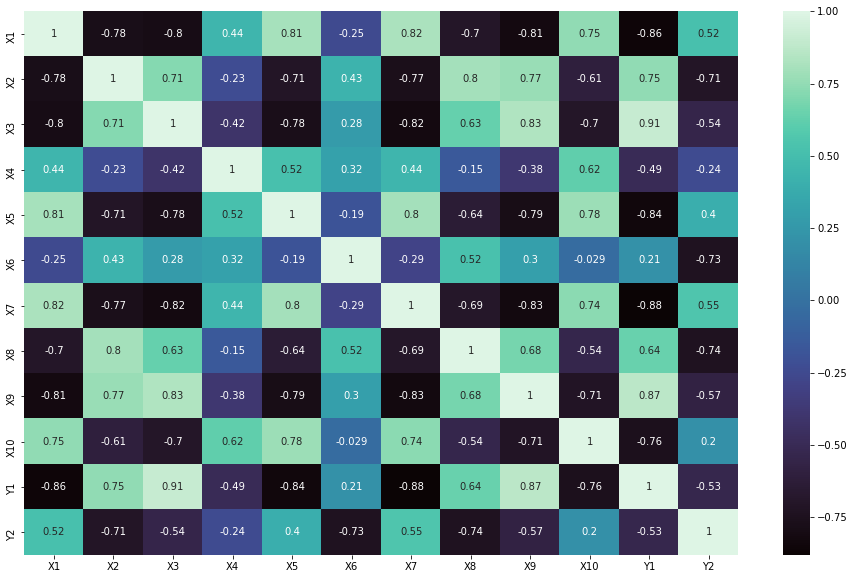

In [13]:

plt.figure(figsize=(16,10))
sns.heatmap(trainDf.corr(), annot=True,cmap="mako")
plt.show()


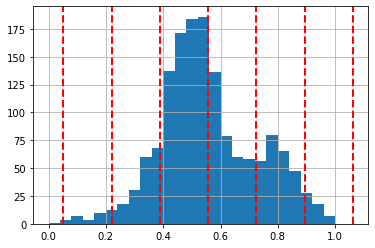

In [14]:
plt.figure()

trainDf['X6'].hist(bins=25)
plt.axvline(trainDf['X6'].mean(), color='r', linestyle='dashed', linewidth=2)
plt.axvline(trainDf['X6'].mean()+trainDf['X6'].std(), color='r', linestyle='dashed', linewidth=2)
plt.axvline(trainDf['X6'].mean()+(2*trainDf['X6'].std()), color='r', linestyle='dashed', linewidth=2)
plt.axvline(trainDf['X6'].mean()+(3*trainDf['X6'].std()), color='r', linestyle='dashed', linewidth=2)
plt.axvline(trainDf['X6'].mean()-(trainDf['X6'].std()),   color='r', linestyle='dashed', linewidth=2)
plt.axvline(trainDf['X6'].mean()-(2*trainDf['X6'].std()), color='r', linestyle='dashed', linewidth=2)
plt.axvline(trainDf['X6'].mean()-(3*trainDf['X6'].std()), color='r', linestyle='dashed', linewidth=2)


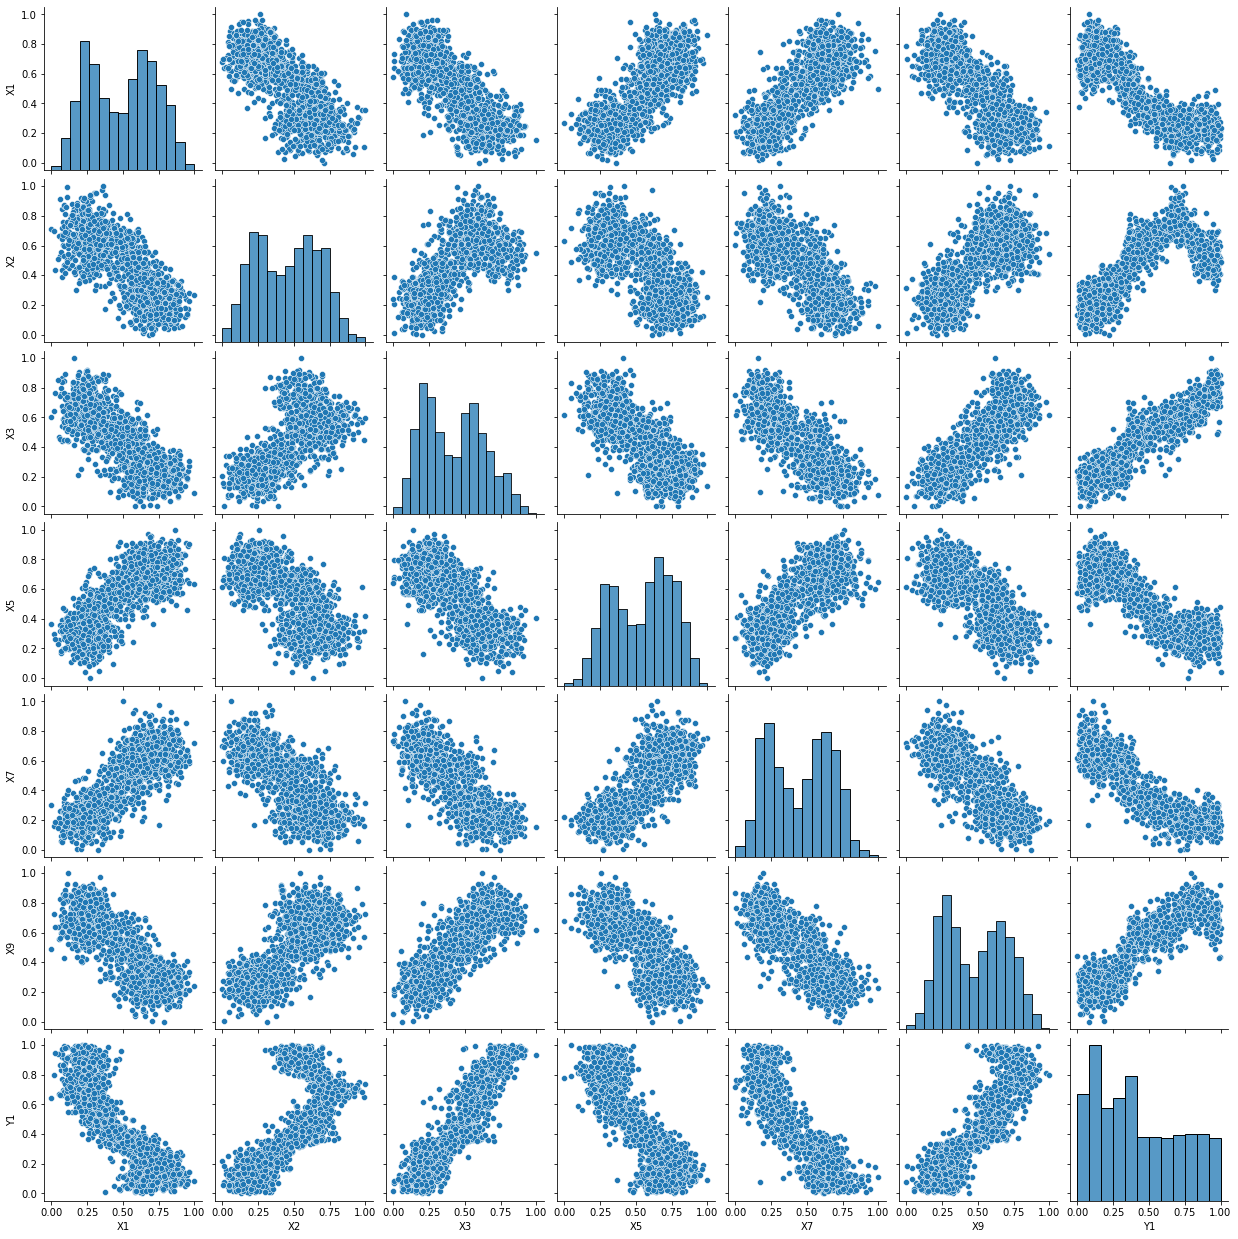

In [18]:

colsY1 = ["X1","X2","X3","X5","X7","X9","Y1"]
sns.pairplot(trainDf[colsY1],height=2.5)


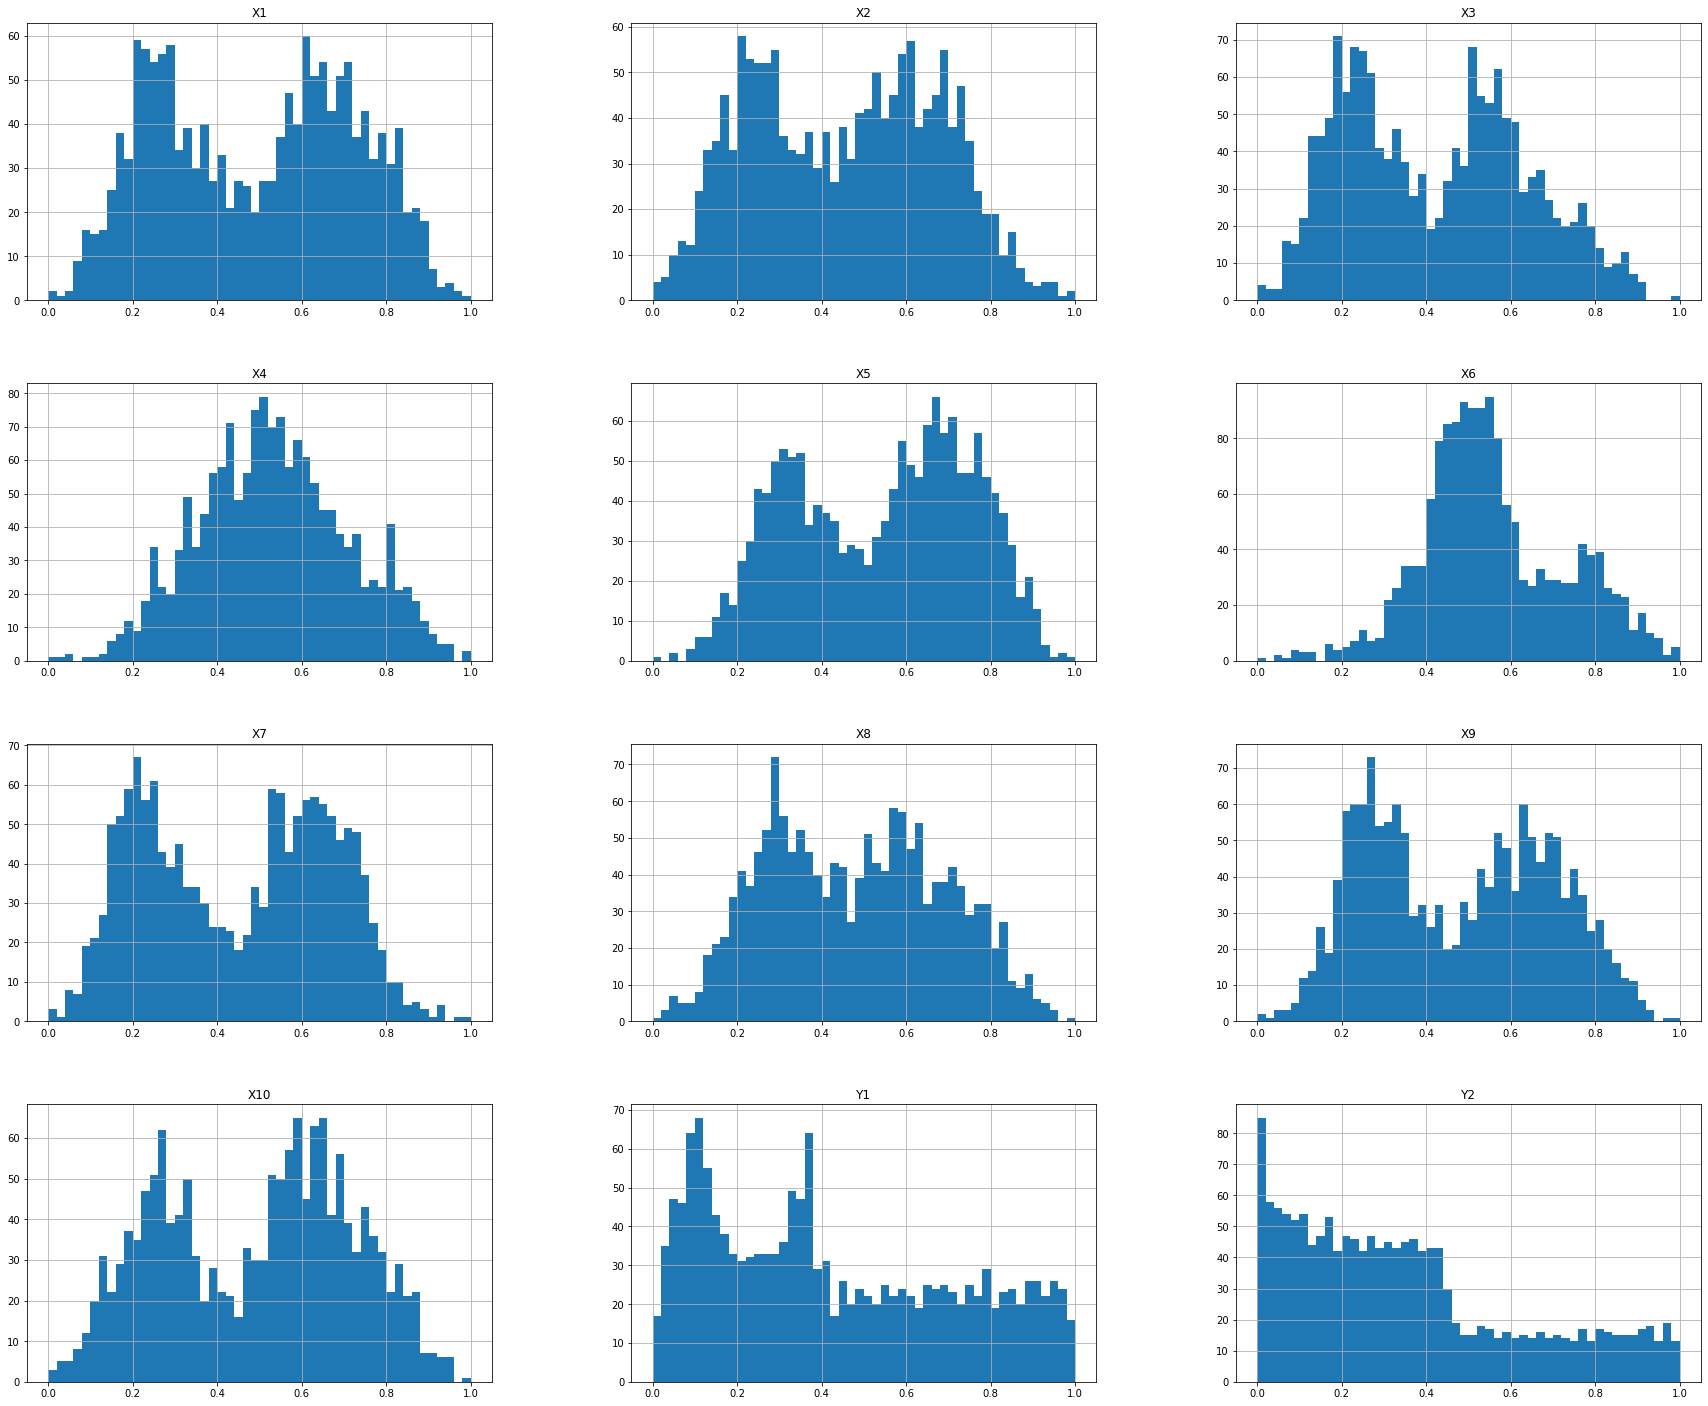

In [17]:
trainDf.hist(bins=50, figsize=(30,25))
plt.show()

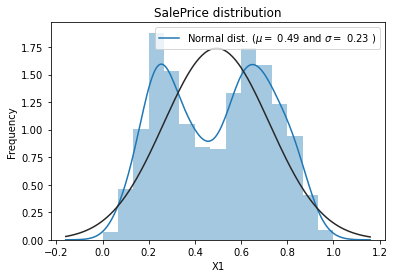

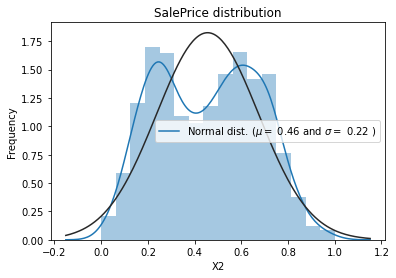

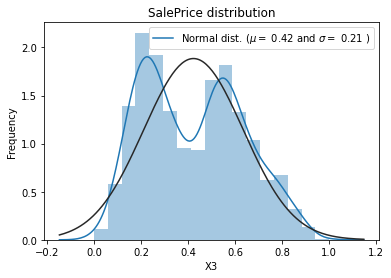

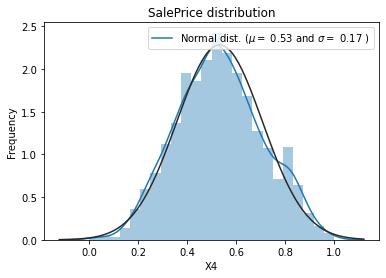

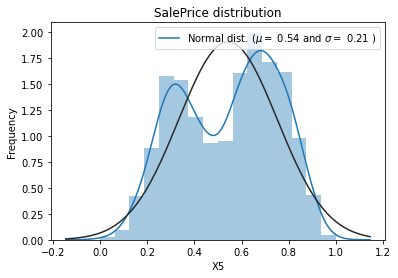

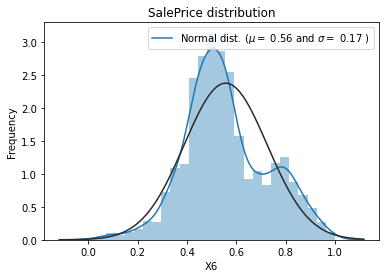

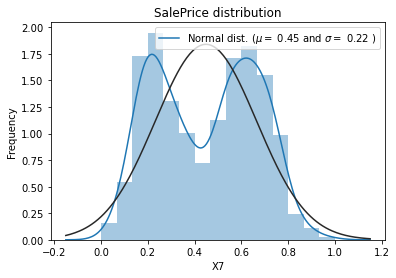

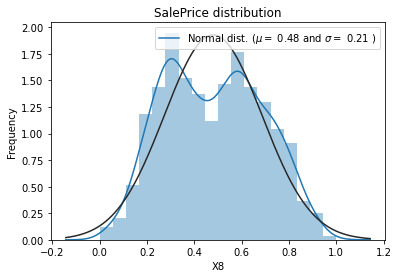

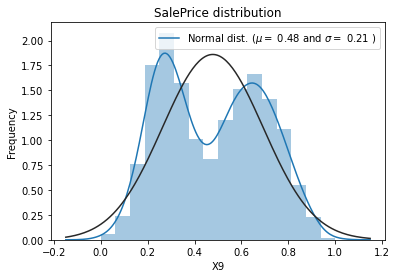

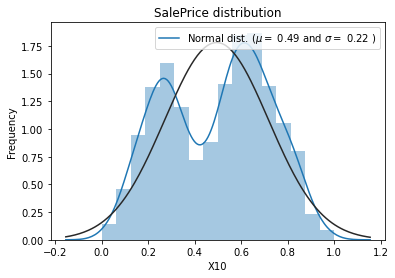

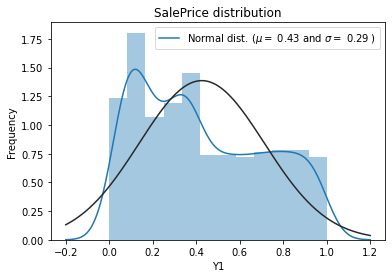

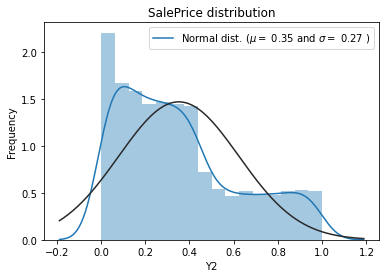

In [35]:
import warnings
warnings.filterwarnings("ignore")
colsY1 = ["X1","X2","X3","X4","X5","X6","X7","X8","X9","X10","Y1","Y2"]
for index,i in enumerate(colsY1):
    
    plt.figure(index)
    sns.distplot(trainDf[i], fit=norm);

    # Get the fitted parameters used by the function
    (mu, sigma) = norm.fit(trainDf[i])
   # print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

    #Now plot the distribution
    plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
                loc='best')
    plt.ylabel('Frequency')
    plt.title('Data distribution')
